# NOTEBOOK Title 
***

Description of your challenge and instructions for challenge participants

⚠️ NOTE: describe everything in detail whethere it is data loading, visualization, training, or scoring. Your competition participants will use all the details to better understand your challenge.

***

`COLAB` determines whether this notebook is running on Google Colab.

In [1]:
COLAB = 'google.colab' in str(get_ipython())

In [2]:
if COLAB:
    # clone github repo
    !git clone --depth 1 https://github.com/FAIR-Universe/M1-AI-Challenge-Class-2025-26.git
    # move to the starting kit folder
    %cd M1-AI-Challenge-Class-2025-26/Starting_Kit/

# 0 - Imports & Settings

In [103]:
import os
import zipfile
import datetime
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd
from PIL import Image
%matplotlib inline

# 1 - Data
This is a sample code to load data. Update this description and the code to load your data

In [104]:
def read_h5(file_dir, file_name):

    return_dict = {}
    
    # Parse metadata from filename
    metadata = file_name.split("_")
    


    
    CAM = metadata[0]
    SITE = metadata[1]
    D = metadata[2]
    M = metadata[3]
    Y = metadata[4]
    TIME = metadata[5]
    F = metadata[6].replace("f=", "")
    NF = metadata[7].replace("nf=", "").replace(".h5", "")
    

    # Extract data from h5 files
    with h5py.File(os.path.join(file_dir, file_name), "r") as f:
        images = f["images"][:]
        labels = f["labels"][:]
        timestamps = f["timestamps"][:]
        visit_numbers = f["visit_numbers"][:]

        # Populate Dictionary with data
        return_dict = {
            "images": images,
            "labels": labels,
            "timestamps": timestamps,
            "visit_numbers": visit_numbers
        }

    # Populate Dictionary with metadata
    
    return_dict ["metadata"] =  {
            "CAM": CAM,
            "SITE": SITE,
            "D": D,
            "M": M,
            "Y": Y,
            "TIME": TIME,
            "F": F,
            "NF": NF,
        }       
    
    return return_dict

def plot_image(img, lbl):
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Label: {lbl}")
    plt.show()

In [ ]:
class Data:
    def __init__(self, data_dir):
        # Modify the constructor as you want
        self.data_dir = data_dir
        
    def load_data(self):
        # TODO: complete this function to load data. You can add more functions if needed
        files = os.listdir(self.data_dir)
        files = [f for f in files if f.endswith('.h5')]
        self.data = [read_h5(self.data_dir, f) for f in files]
                
       

            

    def get_image(self, index):
        return self.data["images"][index]

    def get_label(self, index):
        return self.data["labels"][index]


In [ ]:
# # Example usage
# data = Data(data_dir="./data")

# Example usage
DATA_DIR = "data"
data = Data(data_dir=DATA_DIR)
print(data.load_data())

# 2 - Visualization
This is a sample code to visualize data. Update this description and the code to fit your usecase.

In [114]:
class Visualize:
    def __init__(self, data: Data):
        # Modify the constructor as you want
        self.data = data
    
    def plot_data(self, index):
    # TODO: complete this function to visualize your data. You can add more functions if needed
        

        # Extract single image and its label
        img = self.data.get_image(index)
        lbl = self.data.get_label(index)
        # visualize one image from the data
        plot_image(img, lbl)

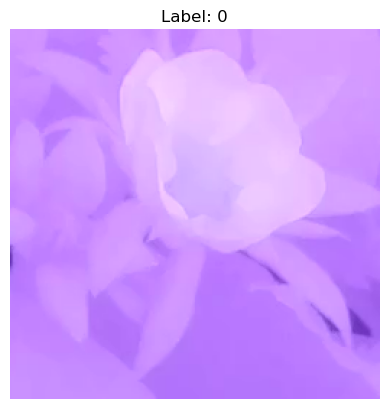

In [148]:
# Example usage
visualize = Visualize(data=data)
visualize.plot_data(420)

# 3 - Training
This is a sample code to train a model using your data. Update this description and the code to fit your usecase. 

In [ ]:
class Train:
    def __init__(self, data: Data):
        # Modify the constructor as you want
        self.data = data
        self.model = None

    # TODO: Add function(s) to train and validate.
    def train(self):
        pass

In [ ]:
# Example usage
train = Train(data=data)
train.train()

# 4 - Scoring
This is a sample code to score your trained model. Update this description and the code to fit your usecase. 

In [ ]:
class Score:
    def __init__(self):
        # Modify the constructor as you want
        self.score = None

    # TODO: Add function(s) to compute score(s)
    def compute_score(self):
        pass

In [ ]:
# Example usage
score = Score()
score.compute_score()

# 5 - (Optional) Prepare submission for Codabench

***

In this section you should prepare a zip of the trained model (if your competition is a code submission competition) or zip of the predictions (if your competition is a result submission competition). 

***

In [ ]:
class Submission:
    def __init__(self, submission_dir, zip_file_name):
        self.submission_dir = submission_dir
        self.zip_file_name = zip_file_name

        os.makedirs(self.submission_dir, exist_ok=True)

    def save_code(self):
        # TODO: Save trained model to submissions directory
        pass

    def save_result(self):
        # TODO: Save predictions to submissions directory
        pass
        
    def zip_submission(self):
        
        # Path to ZIP
        zip_path = os.path.join(self.submission_dir, self.zip_file_name)

        # Create ZIP containing the submission directory files
        with zipfile.ZipFile(zip_path, "w", compression=zipfile.ZIP_DEFLATED) as zf:
            for filename in os.listdir(self.submission_dir):
                file_path = os.path.join(self.submission_dir, filename)

                # Skip the zip file itself
                if file_path == zip_path:
                    continue

                zf.write(file_path, arcname=filename)
        print(f"Submission ZIP saved at: {zip_path}")

In [ ]:
# Example usage
zip_file_name = f"Submission_{datetime.datetime.now().strftime("%y-%m-%d-%H-%M")}.zip"

submission = Submission (
    submission_dir="./submission",
    zip_file_name=zip_file_name
)
submission.save_code()
# or
submission.save_result()

# Zip submission dir
submission.zip_submission()

Submission ZIP saved at: submissions/Submission_25-08-26-21-47.zip
